### MSDM5058 Time Series 1:

Study of time series using classical time series models: Autoregressive (AR), Moving Average (MA) and Autoregressive Moving Average (ARMA) models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [3]:
# Time series examples
np.random.seed()
# Example 0: White noise: $x_t = \epsilon_t$
simulated_noise_data = np.random.randn(10000)

# Example 1: AR(1): $x_t = 0.7 x_{t-1} + \epsilon_t$
ar1 = np.array([1, -0.7])
ma = np.array([1])
simulated_AR1_data = ArmaProcess(ar1, ma).generate_sample(nsample=10000)

# Example 2: AR(1): $x_t = -0.7 x_{t-1} + \epsilon_t$
ar1 = np.array([1, 0.7])
ma = np.array([1])
simulated_AR_1_data = ArmaProcess(ar1, ma).generate_sample(nsample=10000)

# Example 3: MA(1): $x_t = \epsilon_t - 0.7 \epsilon_{t-1}$
ar1 = np.array([1])
ma = np.array([1, -0.7])
simulated_MA1_data = ArmaProcess(ar1, ma).generate_sample(nsample=10000)

# Example 4: AR(2): $x_t = 0.7 x_{t-1} - 0.49 x_{t-2} + \epsilon_t$
ar1 = np.array([1, -0.7, 0.49])
ma = np.array([1])
simulated_AR2_data = ArmaProcess(ar1, ma).generate_sample(nsample=10000)

# Example 5: MA(1): $x_t = 0.7 x_{t-1} + \epsilon_t - 0.7 \epsilon_{t-1}$
ar1 = np.array([1, 0.7])
ma = np.array([1, -0.7])
simulated_ARMA11_data = ArmaProcess(ar1, ma).generate_sample(nsample=10000)
# simulated_ARIMA101_data = ARIMA(simulated_ARMA11_data, order=(1, 0, 1), trend = 'n').fit()
# simulated_ARIMA101_data.summary(), simulated_ARIMA101_data.params

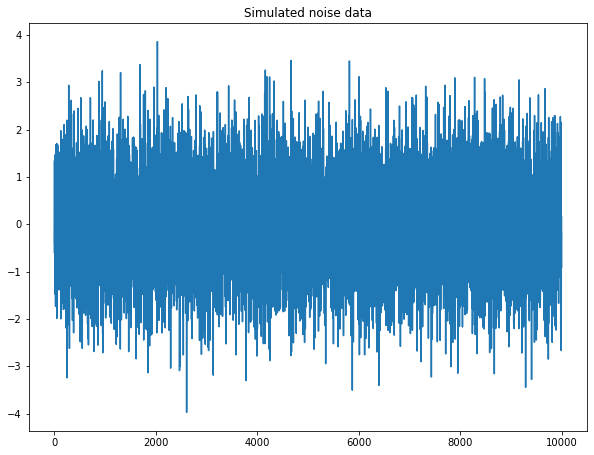

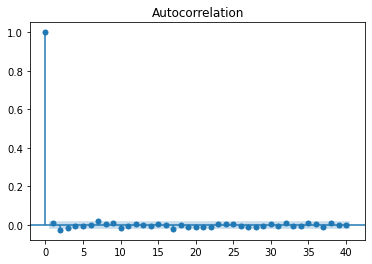

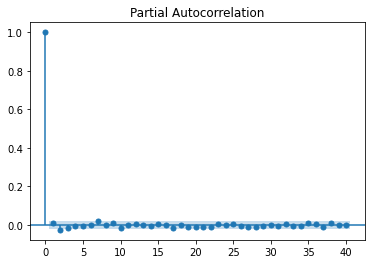

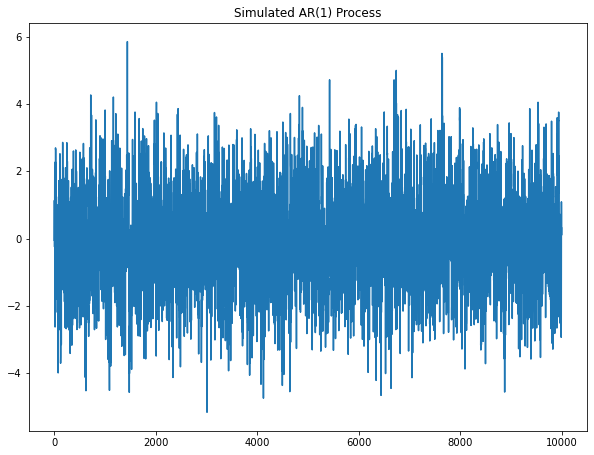

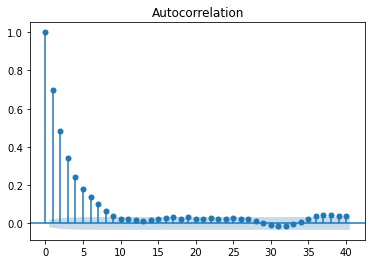

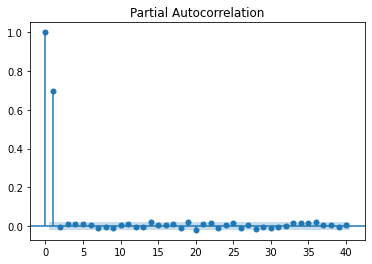

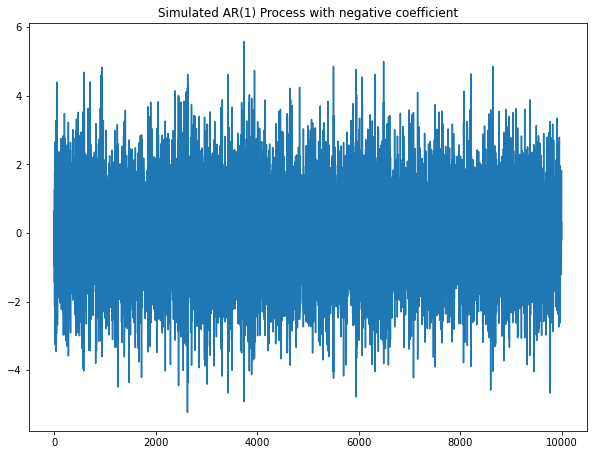

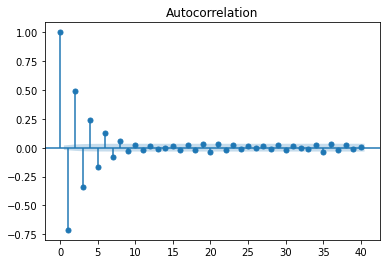

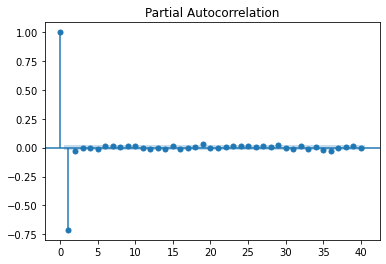

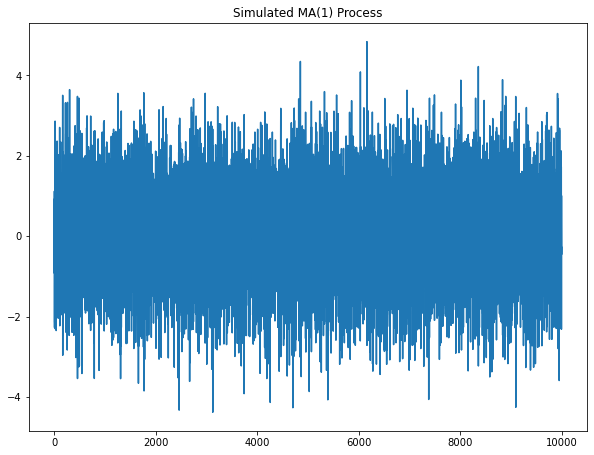

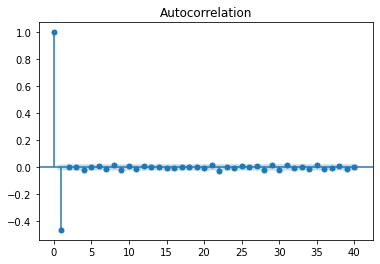

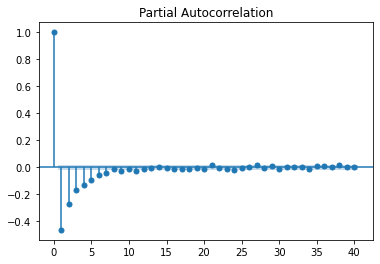

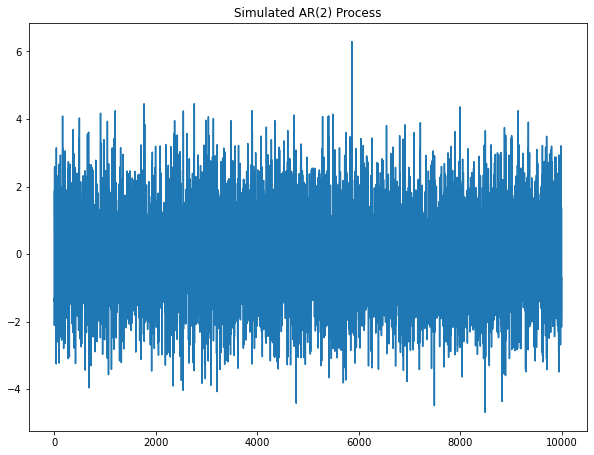

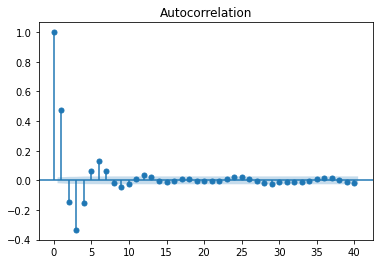

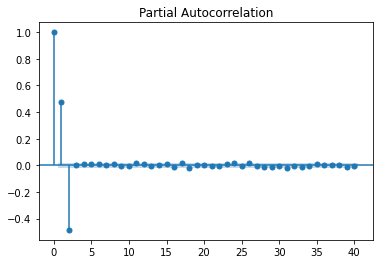

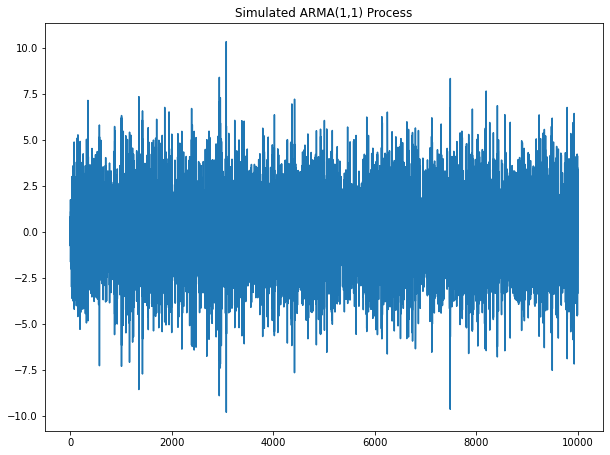

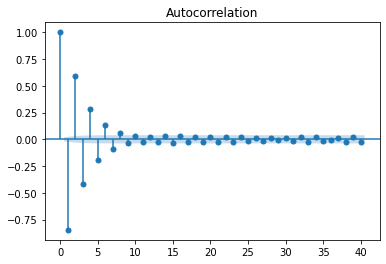

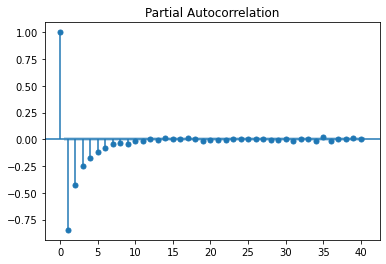

In [4]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_noise_data)
plt.title("Simulated noise data")
plot_acf(simulated_noise_data)
plot_pacf(simulated_noise_data)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR1_data)
plt.title("Simulated AR(1) Process")
plot_acf(simulated_AR1_data)
plot_pacf(simulated_AR1_data)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR_1_data)
plt.title("Simulated AR(1) Process with negative coefficient")
plot_acf(simulated_AR_1_data)
plot_pacf(simulated_AR_1_data)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_MA1_data)
plt.title("Simulated MA(1) Process")
plot_acf(simulated_MA1_data)
plot_pacf(simulated_MA1_data)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plot_acf(simulated_AR2_data)
plot_pacf(simulated_AR2_data)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA11_data)
plt.title("Simulated ARMA(1,1) Process")
plot_acf(simulated_ARMA11_data)
plot_pacf(simulated_ARMA11_data)
plt.show()


In [5]:
#Augmented Dickey-Fuller Test to confirm if time series is stationary

ad_fuller_result = adfuller(simulated_noise_data)
print('Result of ADF test for simulated_noise_data:')
print('ADF Statistic:', ad_fuller_result[0]) #Large -ve stats --> reject null, time series stationary
print('p-value:', ad_fuller_result[1]) #p-value smaller than 0.05 --> reject null, time series stationary
print('used lag:', ad_fuller_result[2]) #No. of lags used
print('critical values: ', ad_fuller_result[4]) #Critical values at 1%, 5%, 10%
ad_fuller_result = adfuller(simulated_AR1_data)
print('\nResult of ADF test for Simulated AR(1) Process:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])
ad_fuller_result = adfuller(simulated_AR_1_data)
print('\nResult of ADF test for Simulated AR(1) Process with negative coefficient:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])
ad_fuller_result = adfuller(simulated_MA1_data)
print('\nResult of ADF test for Simulated MA(1) Process:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])
ad_fuller_result = adfuller(simulated_AR2_data)
print('\nResult of ADF test for Simulated AR(2) Process:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])
ad_fuller_result = adfuller(simulated_ARMA11_data)
print('\nResult of ADF test for Simulated ARMA(1,1) Process:')
print('ADF Statistic:', ad_fuller_result[0]) 
print('p-value:', ad_fuller_result[1]) 
print('used lag:', ad_fuller_result[2])
print('critical values: ', ad_fuller_result[4])

#If p-value larger than 0.05, cannot reject null hyp., apply transformation/diferencing to remove trend

Result of ADF test for simulated_noise_data:
ADF Statistic: -59.39028468934537
p-value: 0.0
used lag: 2
critical values:  {'1%': -3.431004294278137, '5%': -2.861829159140512, '10%': -2.5669239142727114}

Result of ADF test for Simulated AR(1) Process:
ADF Statistic: -42.329910016570736
p-value: 0.0
used lag: 0
critical values:  {'1%': -3.4310041633725734, '5%': -2.861829101294412, '10%': -2.566923883481157}

Result of ADF test for Simulated AR(1) Process with negative coefficient:
ADF Statistic: -95.01785600347901
p-value: 0.0
used lag: 1
critical values:  {'1%': -3.431004228818807, '5%': -2.8618291302145686, '10%': -2.566923898875394}

Result of ADF test for Simulated MA(1) Process:
ADF Statistic: -36.60470987529643
p-value: 0.0
used lag: 11
critical values:  {'1%': -3.4310048840021, '5%': -2.861829419734687, '10%': -2.5669240529873334}

Result of ADF test for Simulated AR(2) Process:
ADF Statistic: -86.96829832778496
p-value: 0.0
used lag: 1
critical values:  {'1%': -3.43100422881880